In [1]:
#See http://www.greenteapress.com/complexity/thinkcomplexity.pdf
#for documentation


class Vertex(object):
    def __init__(self, label = ''):
        self.label = label
    def __repr__(self):
        return "Vertex({0})".format(self.label)
    #__str__ = __repr__
    
class Edge(tuple):
    def __new__(cls, v1, v2, w = 1):
        return tuple.__new__(cls, (v1, v2, w))
    def __repr__(self):
        #return "Edge({0}, {1}) with weight {2}".format(self[0],self[1], self[2])
        return "{0}".format(self[2])
    #__str__ = __repr__
    

class Graph(dict):   
    def __init__(self, vs = [], es = []):       
        for v in vs:
            self.__add_vertex(v) 
        
        for e in es:
            self.__add_edge(e) 
            
        #Build the vertex tree
        assert(self.__check_power_2()), "Not a power of 2"
        self.vertex_tree = vs 
        
        #Build the edge partition tree
        self.edge_partition_tree = self.make_e_p_t()
            
    def __add_vertex(self,v):        
        self[v] = {}   
        
    def __add_edge(self,e):       
        v, x, w = e
        self[v][x] = e
        self[x][v] = e
        
    def __check_power_2(self):
        n = len(self)
        check = 1
        while True:
            if(n == check):
                return True
            elif(n < check):
                return False
            else:
                check = check << 1   
    
    def get_group_of_v(self, level, vertex):
        l = 1 << level
        n = len(self)
        size = n//l
        index = self.vertex_tree.index(vertex)
        return (index//size, size)
    
    def make_edge_node(self, vs, ws):
        edges = []
        for v in vs:
            for w in ws:
                edge = self[v].get(w)
                if(edge and (edge not in edges)):
                    edges.append(self[v].get(w))
        return edges
   
    def make_e_p_t(self):
        n = len(self.vertex_tree)
        vs = self.vertex_tree
        big_n = n
        l = 0
        out = {(n,0,0):self.make_edge_node(vs,vs)}
        while(n>1):
            n = n//2          
            for i in range(0,big_n,n):
                for j in range(i,big_n,n):
                    out[(n,i,j)] = self.make_edge_node(vs[i:i+n],vs[j:j+n])
        return out            
            

In [2]:
def hello(self):
    assert(self.__check_power_2()), "Not a power of 2"
    print ("hello")
Graph.hello = hello

In [3]:
x = Vertex("x")
y = Vertex("y")
z = Vertex("z")
a = Vertex("a")
b = Vertex("b")
c = Vertex("c")
d = Vertex("d")
e = Vertex("e")
f = Vertex("f")
g = Vertex("g")
h = Vertex("h")
i = Vertex("i")
j = Vertex("j")
k = Vertex("k")
l = Vertex("l")
m = Vertex("m")
n = Vertex("n")
o = Vertex("o")
p = Vertex("p")

e1 = Edge(a,c,4)
e2 = Edge(a,d,8)
e3 = Edge(b,e,12)
e4 = Edge(e,f,18)
e5 = Edge(g,h,22)

print(x)

g3 = Graph([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p])
#g3.get_vs_in_group(2, 3)  


g4 = Graph([a,b,c,d,e,f,g,h],[e1,e2,e3,e4,e5])
g4.edge_partition_tree


Vertex(x)


{(1, 0, 0): [],
 (1, 0, 1): [],
 (1, 0, 2): [4],
 (1, 0, 3): [8],
 (1, 0, 4): [],
 (1, 0, 5): [],
 (1, 0, 6): [],
 (1, 0, 7): [],
 (1, 1, 1): [],
 (1, 1, 2): [],
 (1, 1, 3): [],
 (1, 1, 4): [12],
 (1, 1, 5): [],
 (1, 1, 6): [],
 (1, 1, 7): [],
 (1, 2, 2): [],
 (1, 2, 3): [],
 (1, 2, 4): [],
 (1, 2, 5): [],
 (1, 2, 6): [],
 (1, 2, 7): [],
 (1, 3, 3): [],
 (1, 3, 4): [],
 (1, 3, 5): [],
 (1, 3, 6): [],
 (1, 3, 7): [],
 (1, 4, 4): [],
 (1, 4, 5): [18],
 (1, 4, 6): [],
 (1, 4, 7): [],
 (1, 5, 5): [],
 (1, 5, 6): [],
 (1, 5, 7): [],
 (1, 6, 6): [],
 (1, 6, 7): [22],
 (1, 7, 7): [],
 (2, 0, 0): [],
 (2, 0, 2): [4, 8],
 (2, 0, 4): [12],
 (2, 0, 6): [],
 (2, 2, 2): [],
 (2, 2, 4): [],
 (2, 2, 6): [],
 (2, 4, 4): [18],
 (2, 4, 6): [],
 (2, 6, 6): [22],
 (4, 0, 0): [4, 8],
 (4, 0, 4): [12],
 (4, 4, 4): [18, 22],
 (8, 0, 0): [4, 8, 12, 18, 22]}

In [4]:
e6 = Edge(a,d,5)
e7 = Edge(a,g,1)
g4._Graph__add_edge(e6)

def add_edge(self,e):
    v,x,w = e
    if(self[v].get(x) != None):
        print("Edge already exists, delete first")
    else:            
        print("Adding edge")
        l = 1
        level = 1
        n = len(self)
        size = n//l
        a,b,w = e
        a_index = self.vertex_tree.index(a)
        b_index = self.vertex_tree.index(b)
        while True:
            print("l",l, "n",n, level, size, a_index//size, size*(b_index//size))
            self.edge_partition_tree[(size, size*(a_index//size), size*(b_index//size))].append(e)
            if(level>=n):
                break
            else:
                l += 1
                size = n//l
                level = level << 1

        

E1 = Edge(x,y,1)
E2 = Edge(y,z,2)
E3 = Edge(x,z,3)
G = Graph([x,y,z,a],[E1])   
#add_edge(G, E2)
#add_edge(G, E3)
#print(G.edge_partition_tree)
g4 = Graph([a,b,c,d,e,f,g,h],[e1,e2,e3,e4])
add_edge(g4, e5)

Adding edge
l 1 n 8 1 8 0 0
l 2 n 8 2 4 1 4
l 3 n 8 4 2 3 6
l 4 n 8 8 2 3 6


Populating the interactive namespace from numpy and matplotlib
[(0, 1), (0, 2), (2, 3), (3, 4), (3, 5)]
[(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (2, 3, {'weight': 1}), (3, 4, {'weight': 1}), (3, 5, {'weight': 1})]


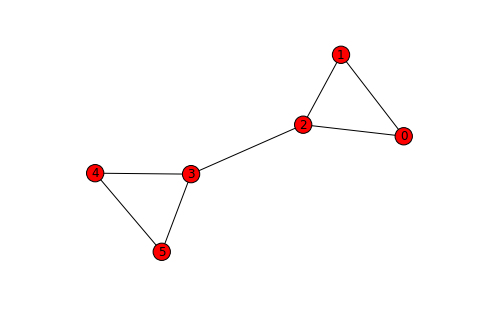

In [13]:
%pylab inline
import networkx as nx
G = nx.Graph(array([[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[0,0,1,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]]))
nx.draw(G)
print(nx.minimum_spanning_tree(G).edges())
print(list(nx.minimum_spanning_edges(G)))